<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [51]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [59]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [5]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [7]:
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [8]:
total_nan =df.isnull().sum()
total_nan

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

<h4>🥷Handling missing value strategy:</h4>

>1/ Focus on Column/Variable of interest : ConvertedCompYearly, JobSat, YearsCodePro, LanguageHaveWorkedWith,LanguageWantToWorkedWith, EdLevel
>
>2/Check for NaN
>
>3/Analyze distribution for each one, either with box plot or histogram
>
>4/Choose how to handle : keep, replace by 'Unknown', replace by mean, median or mode, delete 

In [12]:
nan_by_column = df[['JobSat','YearsCodePro','LanguageHaveWorkedWith', 
                    'LanguageWantToWorkWith','ConvertedCompYearly','EdLevel']].isnull().sum()
nan_by_column

JobSat                    36311
YearsCodePro              13827
LanguageHaveWorkedWith     5692
LanguageWantToWorkWith     9685
ConvertedCompYearly       42002
EdLevel                    4653
dtype: int64

In [17]:
df_stat=df[['JobSat','YearsCodePro','LanguageHaveWorkedWith', 
                    'LanguageWantToWorkWith','ConvertedCompYearly','EdLevel']]
df_stat.describe(include='all')

,JobSat,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,ConvertedCompYearly,EdLevel
count,29126.000000,51610,59745,55752,2.343500e+04,60784
unique,NaN,52,23864,22769,NaN,8
top,NaN,2,HTML/CSS;JavaScript;TypeScript,Python,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
freq,NaN,4168,1002,922,NaN,24942
mean,6.935041,NaN,NaN,NaN,8.615529e+04,NaN
std,2.088259,NaN,NaN,NaN,1.867570e+05,NaN
min,0.000000,NaN,NaN,NaN,1.000000e+00,NaN
25%,6.000000,NaN,NaN,NaN,3.271200e+04,NaN
50%,7.000000,NaN,NaN,NaN,6.500000e+04,NaN
75%,8.000000,NaN,NaN,NaN,1.079715e+05,NaN


In [19]:
df[['JobSat','YearsCodePro','LanguageHaveWorkedWith', 
                    'LanguageWantToWorkWith','ConvertedCompYearly','EdLevel']].dtypes

JobSat                    float64
YearsCodePro               object
LanguageHaveWorkedWith     object
LanguageWantToWorkWith     object
ConvertedCompYearly       float64
EdLevel                    object
dtype: object

>✅Column JobSat

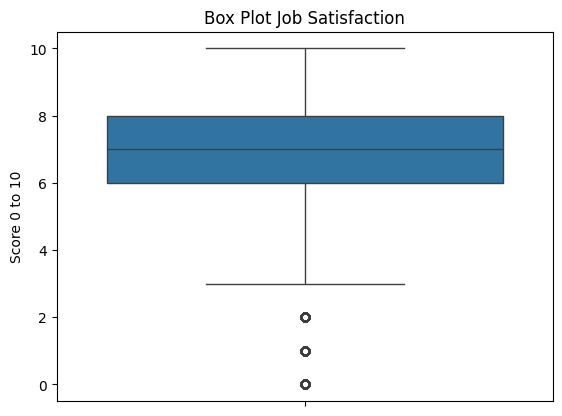

In [24]:
sns.boxplot(data=df['JobSat'])
plt.title('Box Plot Job Satisfaction')
plt.ylabel('Score 0 to 10')
plt.show()

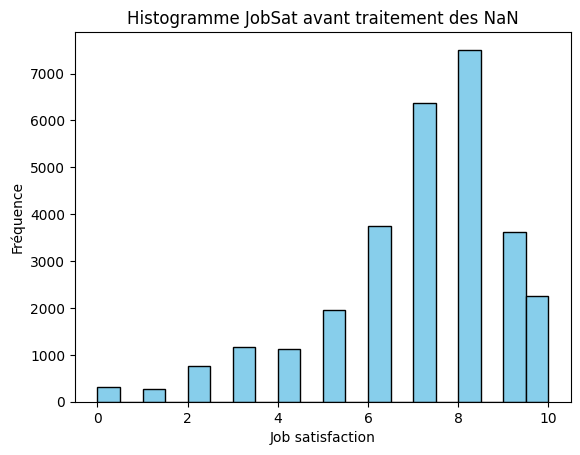

In [32]:
# histogramme avant traitement des NaN
plt.hist(df['JobSat'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogramme JobSat avant traitement des NaN')
plt.xlabel('Job satisfaction')
plt.ylabel('Fréquence')
plt.show()


➡️Replace NaN for JobSat by mean, however, more than 50% of data with NaN, to check impact on distribution

In [26]:
#replace NaN by mean
jobsat_mean = df['JobSat'].mean()
df['JobSat_clean']=df['JobSat'].fillna(jobsat_mean)
#check for NaN replacement
print(df['JobSat_clean'].isnull().sum())

0


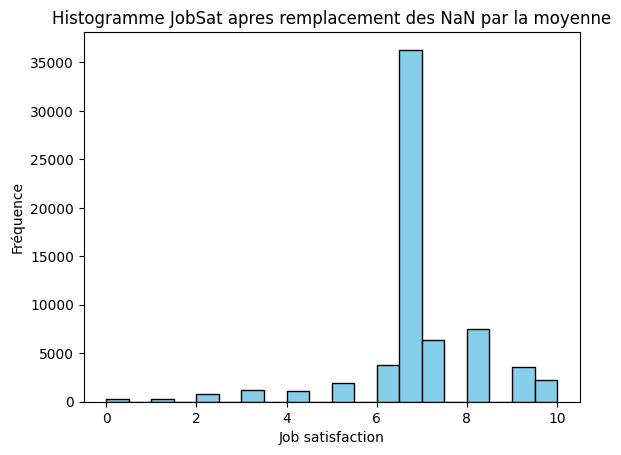

In [30]:
# Distribution
plt.hist(df['JobSat_clean'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogramme JobSat apres remplacement des NaN par la moyenne')
plt.xlabel('Job satisfaction')
plt.ylabel('Fréquence')
plt.show()


➡️Catégorisation de la variable JobSat car remplacer NaN par la moyenne impacte la distribution:

0–3 : Insatisfait
4–7 : Moyennement satisfait
8–10 : Très satisfait) 
NaN : 'Unknown'

In [84]:
def job_satisfaction(score):
    # Gestion des cas spécifiques (chaînes)
    if score <=3:
        return 'Insatisfied'
    elif 3< score <=5 :
        return 'Moderately Satisfied'
    elif 5< score <=8:
        return 'Satisfied'
    elif 8< score <=10 :
        return 'Very Satisfied'
    else:
        return 'Unknown'

# Appliquer la fonction
df['JobSat_categorized'] = df['JobSat'].apply(job_satisfaction)

# Vérification des catégories
print(df['JobSat_categorized'].value_counts())

JobSat_categorized
Unknown                 36311
Satisfied               17639
Very Satisfied           5877
Moderately Satisfied     3086
Insatisfied              2524
Name: count, dtype: int64


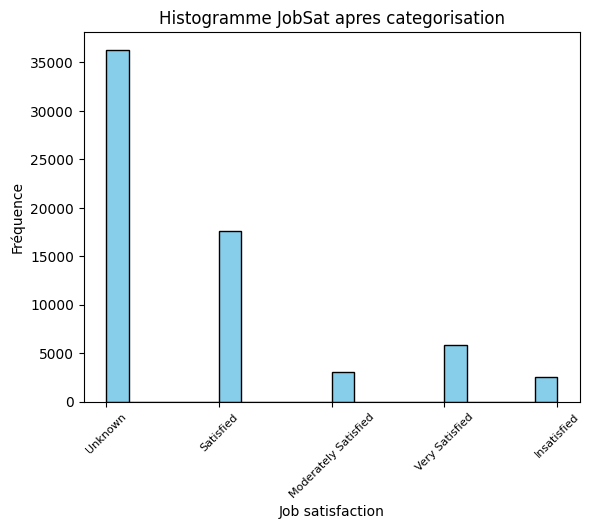

In [90]:
# Exemple de variable quantitative
plt.hist(df['JobSat_categorized'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogramme JobSat apres categorisation')
plt.xlabel('Job satisfaction')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, fontsize=8)
plt.show()

🧹Pour la variable JobSat, categorisation des scores et NaN convertis en Unknown car trop nombreux, le remplacement des NaN par le mode ou la moyenne change la distribution et creer un biais potentiel

>✅Variable ConvertedCompYearly

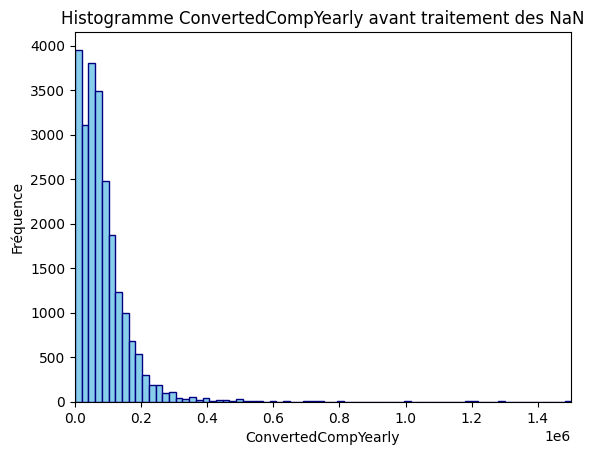

In [57]:
# histogramme avant traitement des NaN
plt.hist(df['ConvertedCompYearly'], bins=800, color='skyblue', edgecolor='navy')
plt.title('Histogramme ConvertedCompYearly avant traitement des NaN')
plt.xlabel('ConvertedCompYearly')
plt.xlim([0,0.15e7])
plt.ylabel('Fréquence')
plt.show()

In [58]:
#reaplce NaN by mean or median
convertedcompyearly_mean = df['ConvertedCompYearly'].mean()
convertedcompyearly_median = df['ConvertedCompYearly'].median()
print(convertedcompyearly_mean)
print(convertedcompyearly_median)

86155.28726264134
65000.0


In [59]:
converted_compyearly_max = df['ConvertedCompYearly'].max()
converted_compyearly_max

np.float64(16256603.0)

In [60]:
#remplacer les NaN par la mediane
df['ConvertedCompYearly_clean']=df['ConvertedCompYearly'].fillna(convertedcompyearly_median) 
#verifier le traitement des NaN
print(df['ConvertedCompYearly_clean'].isnull().sum())

0


🧹Il y a quelques valeurs aberrantes/outliers dans la variable ConvertedCompYearly. 
La médiane vs la moyenne, est insensible aux outliers et reflète mieux la tendance centrale pour ce type de distribution.

>✅Variable Employment

✨Aucun NaN !!!!✨

>✅Variable YearsCodePro (13827 NaN)

In [61]:
print(df['YearsCodePro'].unique())

[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


In [72]:
occurrences = df['YearsCodePro'].value_counts()
print(occurrences['Less than 1 year'])
print(occurrences['More than 50 years'])

2856
50


le remplacement de ces deux chaines string ne devrait pas biaiser l'analyse ni perturber la distribution

In [63]:
#remplacer les 'chaines string' par une valeur numerique / utiliser un dictionnaire pour ne pas ecraser les donnees
df['YearsCodePro_standardized'] = df['YearsCodePro'].replace({
    'Less than 1 year': 1,
    'More than 50 years': 51
})

print(df['YearsCodePro_standardized'].unique())

[nan '17' '27' '7' '11' '25' '12' '10' '3' 1 '18' '37' '15' '20' '6' '2'
 '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33' '13' '35'
 '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44' '42' '41'
 '36' '38' 51 '43' '47' '48' '46' '49']


In [69]:
df['YearsCodePro_standardized'].describe()

count     51610
unique       52
top           2
freq       4168
Name: YearsCodePro_standardized, dtype: object

In [70]:
#convertir la variable en type numeric (float ou integer)
df['YearsCodePro_standardized'] = pd.to_numeric(df['YearsCodePro_standardized'], errors='coerce')
df['YearsCodePro_standardized'].describe()

count    51610.000000
mean        10.239682
std          9.050513
min          1.000000
25%          3.000000
50%          7.000000
75%         15.000000
max         51.000000
Name: YearsCodePro_standardized, dtype: float64

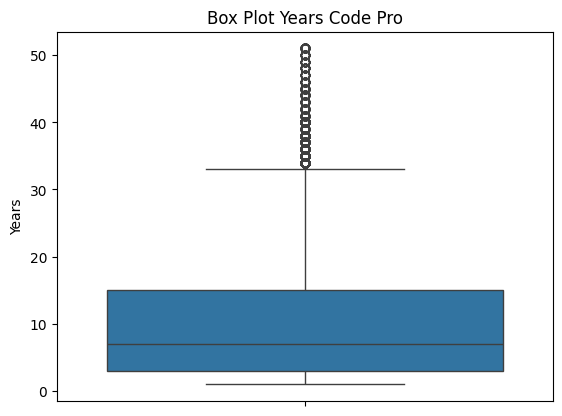

In [71]:
sns.boxplot(data=df['YearsCodePro_standardized'])
plt.title('Box Plot Years Code Pro')
plt.ylabel('Years')
plt.show()

🧹remplacer les NaN par la moyenne

In [73]:
#remplacer les NaN par la moyenne
yearscode_mean = df['YearsCodePro_standardized'].mean()
yearscode_median = df['YearsCodePro_standardized'].median()

In [74]:
df['YearsCodePro_standardized']=df['YearsCodePro_standardized'].fillna(yearscode_mean)

In [75]:
print(df['YearsCodePro_standardized'].isnull().sum())

0


>✅LanguageHaveWorkedWith,LanguageWantToWorkWith

In [39]:
nan_by_column = df[['LanguageHaveWorkedWith','LanguageWantToWorkWith']].isnull().sum()
nan_by_column

LanguageHaveWorkedWith    5692
LanguageWantToWorkWith    9685
dtype: int64

In [42]:
print(df['LanguageHaveWorkedWith'].unique())

[nan
 'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript'
 'C#' ...
 'Bash/Shell (all shells);C;C#;C++;Delphi;Groovy;HTML/CSS;Java;JavaScript;Objective-C;PowerShell;Python;SQL;Swift;TypeScript'
 'C;C++;Go;Lua;Objective-C;Python;Rust;SQL'
 'C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript']


🧹9 to 15% of NaN for LanguageHaveWorkedWith and LanguageWantToWorkWith respectively
NaN will be replaced by most frequent value (mode) for both

In [43]:
most_freq_langHWW = df['LanguageHaveWorkedWith'].mode()[0]
most_freq_langHWW

'HTML/CSS;JavaScript;TypeScript'

In [44]:
most_freq_lang_WTWW = df['LanguageWantToWorkWith'].mode()[0]
most_freq_lang_WTWW

'Python'

In [45]:
#replace NaN by mode for both variable
df['LanguageHaveWorkedWith']=df['LanguageHaveWorkedWith'].fillna(most_freq_langHWW)
df['LanguageWantToWorkWith']=df['LanguageWantToWorkWith'].fillna(most_freq_lang_WTWW) 
print(df['LanguageHaveWorkedWith'].isnull().sum())
print(df['LanguageWantToWorkWith'].isnull().sum())

0
0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



☑️For JobSat variable, see categorization. NaN kept since represents more than 50% of data.

☑️Employment : no missing value, categorization for more convenience and improve analysis

In [76]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [83]:
#categoriser les donnees de la variable Employment
def employment_cat(status):
    if pd.isna(status):  # juste au cas ou mais il n'y a pas de NaN
        return 'Unknown'
    elif 'full-time' in status and 'Employed' in status:
        return 'Employed full-time'
    elif 'part-time' in status and 'Employed' in status:
        return 'Employed part-time'
    elif 'Student' in status:
        return 'Student'
    elif 'freelancer' in status or 'Independent contractor' in status or 'self-employed' in status:
        return 'Freelancer'
    elif 'Not employed' in status:
        return 'Unemployed'
    else:
        return 'Other'

# Application de la fonction
df['Employment_status'] = df['Employment'].apply(employment_cat)

# Aperçu des résultats
print(df[['Employment_status']].value_counts())

Employment_status 
Employed full-time    46432
Student                7166
Freelancer             5363
Unemployed             3036
Employed part-time     2369
Other                  1071
Name: count, dtype: int64


☑️YearsCodePro was cleaned for NaN and string value, distribution show that categorization will optimize the analysis

In [77]:
df['YearsCodePro_standardized'].value_counts()

YearsCodePro_standardized
10.239682    13827
1.000000      5495
2.000000      4168
3.000000      4093
5.000000      3526
10.000000     3251
4.000000      3215
6.000000      2843
8.000000      2549
7.000000      2517
12.000000     1777
15.000000     1635
20.000000     1549
9.000000      1493
11.000000     1312
13.000000     1127
14.000000     1082
25.000000      998
16.000000      946
18.000000      867
17.000000      814
30.000000      689
24.000000      632
19.000000      516
22.000000      492
23.000000      448
26.000000      426
27.000000      380
21.000000      380
28.000000      342
35.000000      285
29.000000      196
40.000000      194
32.000000      194
34.000000      169
38.000000      134
33.000000      132
36.000000      119
31.000000      106
37.000000      104
45.000000       56
42.000000       55
39.000000       54
41.000000       51
51.000000       50
44.000000       42
43.000000       37
46.000000       21
50.000000       14
48.000000       14
49.000000       11
47.00

In [80]:
#categoriser les annees de codage pour une meilleure analyse
def coding_exp(years):
    if years <=2:
        return '0-2'
    elif 2< years <=5 :
        return '3-5'
    elif 5< years <=10 :
        return '6-10'
    elif 10< years <=20:
        return '11-20'
    elif 20< years <=30:
        return '21-30'
    else :
        return 'more than 30'

# Appliquer la fonction
df['Experience_coding'] = df['YearsCodePro_standardized'].apply(coding_exp)

# Vérification des catégories
print(df['Experience_coding'].value_counts())

Experience_coding
11-20           25452
6-10            12653
3-5             10834
0-2              9663
21-30            4983
more than 30     1852
Name: count, dtype: int64


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


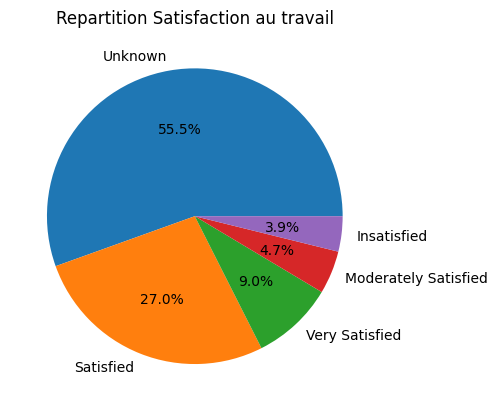

In [97]:
#pie chart for JobSat_categorized
counts = df['JobSat_categorized'].value_counts()
plt.pie(x=counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Repartition Satisfaction au travail')
plt.show()

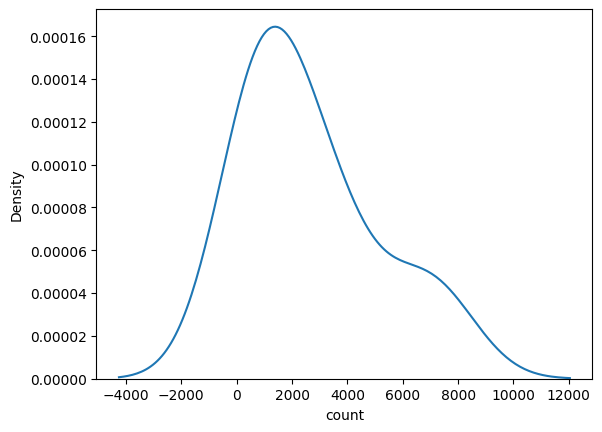

In [100]:
counts_kde = df['JobSat'].value_counts()
sns.kdeplot(data=counts_kde)
plt.show()

💡Histogramme vs KDE pour visualiser la distribution d'une variable :💡
Différences principales entre KDE et histogramme :
Histogramme :

Approche discrète : L'histogramme divise les données en intervalles (ou bins) et montre la fréquence des observations dans chaque intervalle.

Contrôle direct : Vous pouvez ajuster la taille des bins, ce qui peut affecter la lisibilité et la précision de la représentation.

Aspect "blocky" : L'apparence peut être moins lisse, surtout si les données sont peu nombreuses ou si les bins sont trop larges.

KDE :

Approche lisse : Le KDE utilise une fonction de lissage (comme une courbe gaussienne) pour estimer la densité de probabilité à chaque point.

Plus représentatif : Il montre une approximation continue de la distribution, ce qui peut être utile pour observer les formes générales (par exemple, une courbe normale ou bimodale).

Moins dépendant des choix techniques : Contrairement à l'histogramme, il n'est pas affecté par la taille des bins.

En résumé :
Histogramme : Idéal pour une vue directe des fréquences.

KDE : Utile pour une visualisation plus fluide et une estimation précise des probabilités.


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


*💡cf. LAB 12 : Étapes : (Copilot AI)

Séparer les réponses multiples : Les réponses sont séparées par un délimiteur (;). Utilisez la méthode str.split() pour éclater les données.

Exploser les données : Transformez chaque liste de langages en lignes distinctes avec la méthode explode().

Filtrer et regrouper par pays : Utilisez groupby() pour analyser la fréquence des langages par pays.

Créer un tableau ou pivot : Agrégez les résultats pour un tableau récapitulatif.*

In [104]:
df['LanguageHaveWorkedWith'].head()

0                       HTML/CSS;JavaScript;TypeScript
1    Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                   C#
3    C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4              C++;HTML/CSS;JavaScript;Lua;Python;Rust
Name: LanguageHaveWorkedWith, dtype: object

In [103]:
# Séparer les langages multiples
df['LanguageList_HWW'] = df['LanguageHaveWorkedWith'].str.split(';')

# Exploser pour avoir une ligne par langage
df_exploded = df.explode('LanguageList_HWW')

# Compter les occurrences de chaque langage
language_counts = df_exploded['LanguageList_HWW'].value_counts()
print(language_counts)

LanguageList_HWW
JavaScript                 43184
HTML/CSS                   37508
Python                     30719
SQL                        30682
TypeScript                 28842
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
PHP                        10951
PowerShell                  8328
Go                          8103
Rust                        7559
Kotlin                      5665
Lua                         3728
Dart                        3594
Assembly                    3233
Ruby                        3147
Swift                       2829
R                           2595
Visual Basic (.Net)         2499
MATLAB                      2378
VBA                         2248
Groovy                      2004
Scala                       1547
Perl                        1482
GDScript                    1402
Objective-C                 1283
Elixir                    

In [105]:
# Séparer les langages multiples
df['LanguageList_WTWW'] = df['LanguageWantToWorkWith'].str.split(';')

# Exploser pour avoir une ligne par langage
df_exploded = df.explode('LanguageList_WTWW')

# Compter les occurrences de chaque langage
language_counts_1 = df_exploded['LanguageList_WTWW'].value_counts()
print(language_counts_1)

LanguageList_WTWW
Python                     34732
JavaScript                 23774
SQL                        22400
HTML/CSS                   20721
TypeScript                 20239
Rust                       17232
Go                         13837
Bash/Shell (all shells)    13744
C#                         12921
C++                        10873
Java                       10668
C                           8275
Kotlin                      7379
PHP                         5745
PowerShell                  4287
Swift                       3877
Dart                        3709
Zig                         3688
Lua                         3322
Assembly                    3007
Elixir                      2895
Ruby                        2774
Haskell                     2221
R                           2177
Scala                       1790
GDScript                    1667
Clojure                     1331
F#                          1272
Julia                       1263
Lisp                     

/tmp/ipykernel_298/547435289.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(top_10_languages_HWW.index, rotation=90, fontsize=9)
/tmp/ipykernel_298/547435289.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(top_10_languages_WTWW.index,rotation=90, fontsize=9)


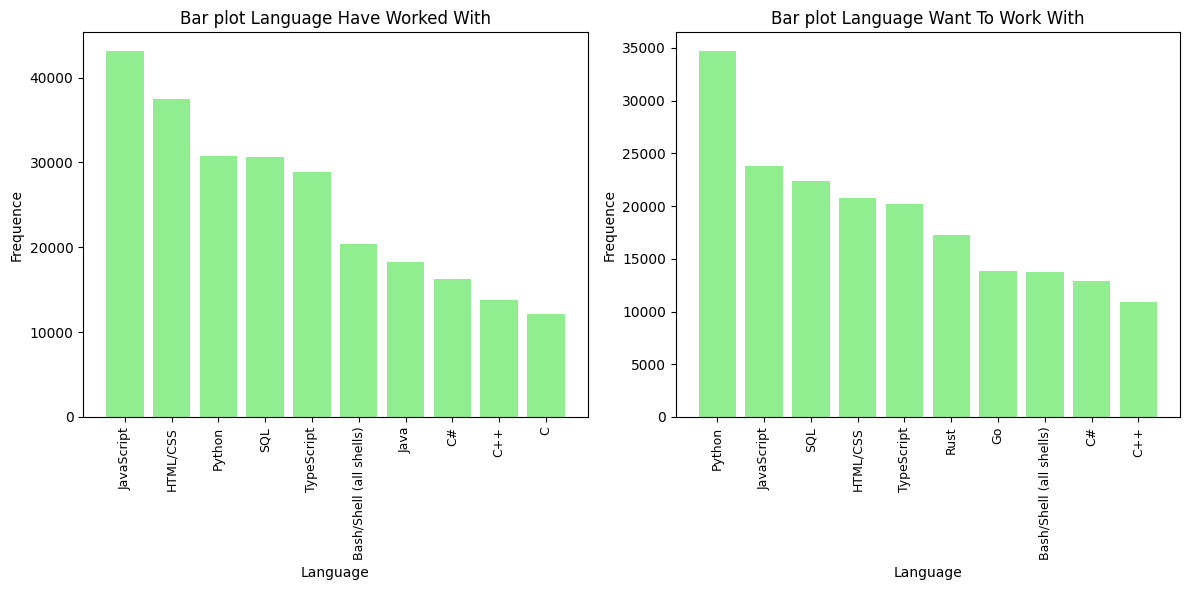

In [117]:
top_10_languages_HWW = language_counts.nlargest(10)
top_10_languages_WTWW = language_counts_1.nlargest(10)
# Créer la figure et les axes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  

# Premier graphique sur le premier subplot (ax[0])
ax[0].bar(x=top_10_languages_HWW.index, height=top_10_languages_HWW.values, color='lightgreen')
ax[0].set_title("Bar plot Language Have Worked With")
ax[0].set_xlabel("Language")
ax[0].set_ylabel("Frequence")
ax[0].set_xticklabels(top_10_languages_HWW.index, rotation=90, fontsize=9)

# Deuxième graphique sur le deuxième subplot (ax[1])
ax[1].bar(x=top_10_languages_WTWW.index, height=top_10_languages_WTWW.values, color='lightgreen')
ax[1].set_title("Bar plot Language Want To Work With")
ax[1].set_xlabel("Language")
ax[1].set_ylabel("Frequence")
ax[1].set_xticklabels(top_10_languages_WTWW.index,rotation=90, fontsize=9)

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher les graphiques
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [118]:
pivot_Remote_country = pd.crosstab(df['RemoteWork'], df['Country'])
pivot_Remote_country

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of...",Viet Nam,Yemen,Zambia,Zimbabwe
RemoteWork,,,,,,,,,,,,,,,,,,,,,
"Hybrid (some remote, some in-person)",17,14,19,1,4,2,74,21,542,452,...,1288,11,3200,39,8,10,62,3,4,8
In-person,13,10,8,5,6,0,33,12,163,136,...,307,9,1472,4,33,9,110,5,5,6
Remote,10,14,22,4,5,1,194,20,330,136,...,1152,3,4766,44,13,40,28,4,3,6


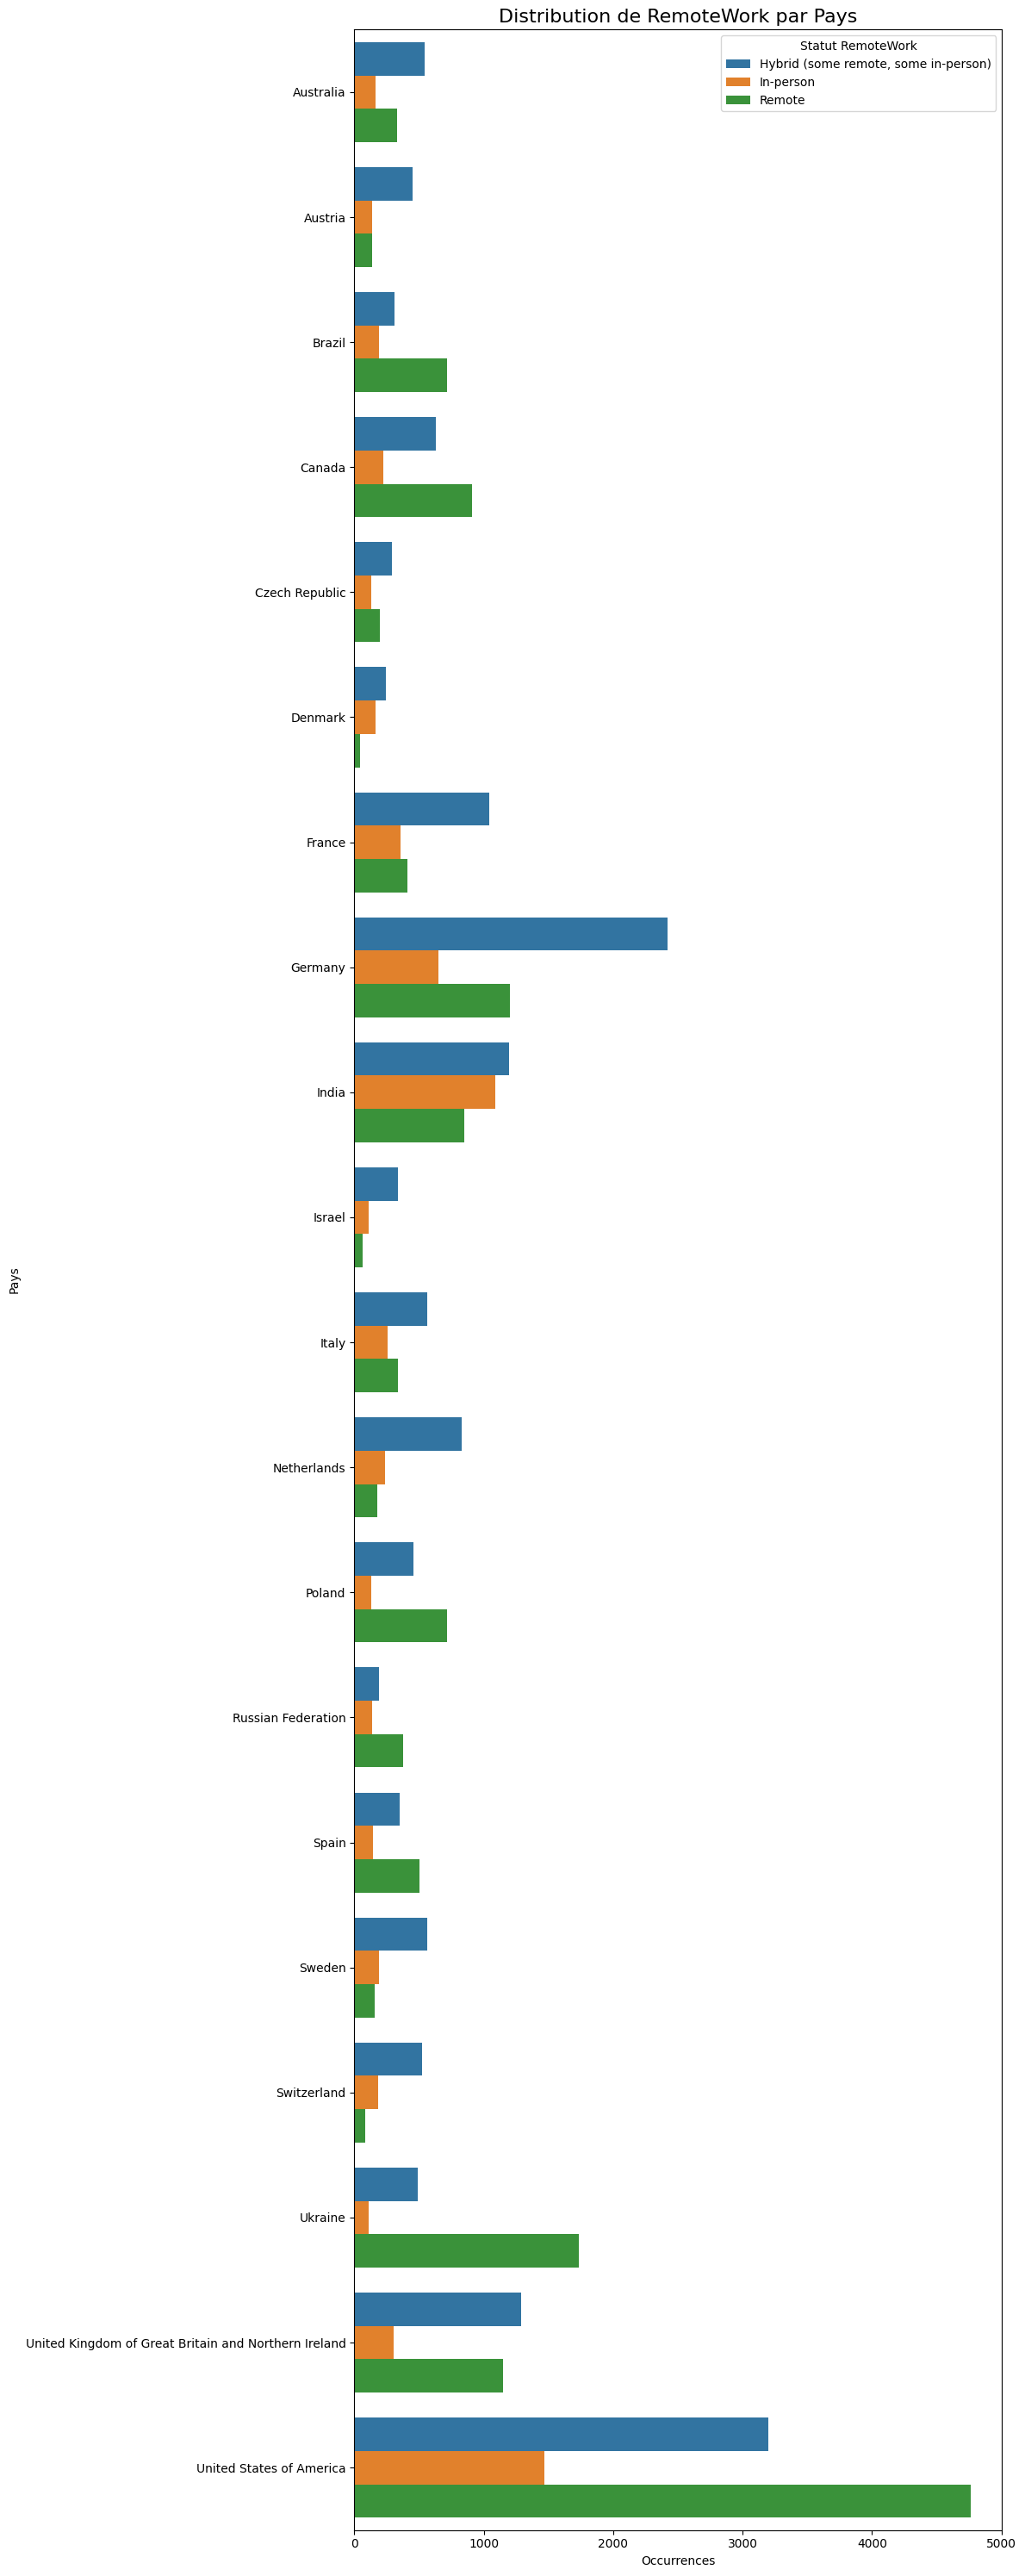

In [121]:
# Transformer la pivot table en un format exploitable pour Seaborn
pivot_Remote_country.reset_index(inplace=True)  # Réinitialise les index pour rendre RemoteWork une colonne
pivot_melted = pivot_Remote_country.melt(id_vars='RemoteWork', var_name='Country', value_name='Occurrences')
top_countries = pivot_melted.groupby('Country')['Occurrences'].sum().nlargest(20).index  #limiter a 20 pays
filtered_data = pivot_melted[pivot_melted['Country'].isin(top_countries)]


# Tracer un bar plot horizontal
plt.figure(figsize=(12, 30))  # Ajuster la taille pour un affichage clair (largeur x hauteur)
sns.barplot(
    data=filtered_data,
    x='Occurrences',
    y='Country',
    hue='RemoteWork',  # Statuts comme "hue"
    orient='h',  # Barres horizontales
    dodge=True  # Différencier par statut
)

# Personnalisation des axes et du titre
plt.title('Distribution de RemoteWork par Pays', fontsize=16)
plt.xlabel('Occurrences')
plt.ylabel('Pays')
plt.legend(title='Statut RemoteWork', loc='upper right')
plt.tight_layout()

# Afficher le graphique
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


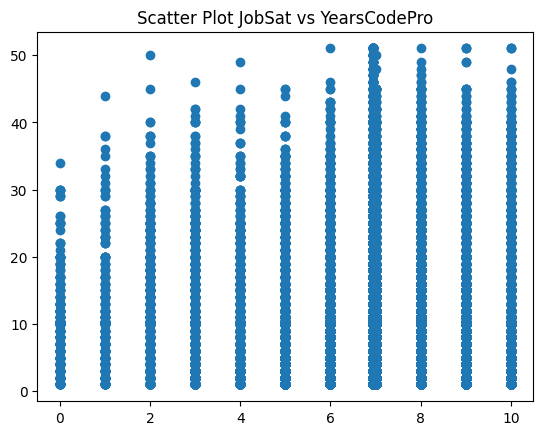

In [133]:
#correlation JobSat vs YearsCodePro
plt.scatter(df['JobSat_sans_nan'],df['YearsCodePro_standardized'])
plt.title('Scatter Plot JobSat vs YearsCodePro') 
plt.show()

In [131]:
!pip install scipy
from scipy import stats 

In [128]:
#traiter les NaN de JobSat en remplacant par la moyenne
df['JobSat_sans_nan']=df['JobSat'].fillna(jobsat_mean)
print(df['JobSat_sans_nan'].isnull().sum())

0


In [130]:
pearson_coef, p_value = stats.pearsonr(df['JobSat_sans_nan'], df['YearsCodePro_standardized'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.07093029392951783  with a P-value of P = 9.425850650528687e-74


✅Pas de correlation visuelle avec le scatter plot, le coefficient de Pearson confirme aucune correlation.

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [134]:
print(df['EdLevel'].unique())

['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else' nan]


In [135]:
pivot_Employment_EdLevel = pd.crosstab(df['Employment_status'], df['EdLevel'])
pivot_Employment_EdLevel

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Employment_status,,,,,,,,
Employed full-time,1295,19523,12572,234,2319,2199,4780,459
Employed part-time,77,759,549,40,122,252,332,51
Freelancer,164,1775,1443,71,261,411,814,75
Other,27,254,170,57,125,110,128,94
Student,145,1481,359,611,62,2465,1184,172
Unemployed,85,1150,464,133,81,356,413,81


In [161]:
print(pivot_Employment_EdLevel.head())  # Vérifiez où se trouvent les noms

EdLevel  level_0  index   Employment_status  \
0              0      0  Employed full-time   
1              1      1  Employed part-time   
2              2      2          Freelancer   
3              3      3               Other   
4              4      4             Student   

EdLevel  Associate degree (A.A., A.S., etc.)  \
0                                       1295   
1                                         77   
2                                        164   
3                                         27   
4                                        145   

EdLevel  Bachelor’s degree (B.A., B.S., B.Eng., etc.)  \
0                                               19523   
1                                                 759   
2                                                1775   
3                                                 254   
4                                                1481   

EdLevel  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  \
0                        

In [162]:
pivot_Employment_EdLevel = pivot_Employment_EdLevel.drop(columns=['level_0', 'index'], errors='ignore')

In [163]:
print(pivot_Employment_EdLevel.head())  # Vérifiez où se trouvent les noms

EdLevel   Employment_status  Associate degree (A.A., A.S., etc.)  \
0        Employed full-time                                 1295   
1        Employed part-time                                   77   
2                Freelancer                                  164   
3                     Other                                   27   
4                   Student                                  145   

EdLevel  Bachelor’s degree (B.A., B.S., B.Eng., etc.)  \
0                                               19523   
1                                                 759   
2                                                1775   
3                                                 254   
4                                                1481   

EdLevel  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  \
0                                                  12572   
1                                                    549   
2                                                   1443   
3       

In [169]:
print(pivot_Employment_EdLevel.columns)

Index(['Associate degree (A.A., A.S., etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Something else'],
      dtype='object', name='EdLevel')


In [168]:
pivot_Employment_EdLevel_reset = pivot_Employment_EdLevel.reset_index()
print(pivot_Employment_EdLevel_reset.head())  # Vérifiez les colonnes après reset_index

EdLevel   Employment_status  Associate degree (A.A., A.S., etc.)  \
0        Employed full-time                                 1295   
1        Employed part-time                                   77   
2                Freelancer                                  164   
3                     Other                                   27   
4                   Student                                  145   

EdLevel  Bachelor’s degree (B.A., B.S., B.Eng., etc.)  \
0                                               19523   
1                                                 759   
2                                                1775   
3                                                 254   
4                                                1481   

EdLevel  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  \
0                                                  12572   
1                                                    549   
2                                                   1443   
3       

/tmp/ipykernel_298/2889008729.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x3000 with 0 Axes>

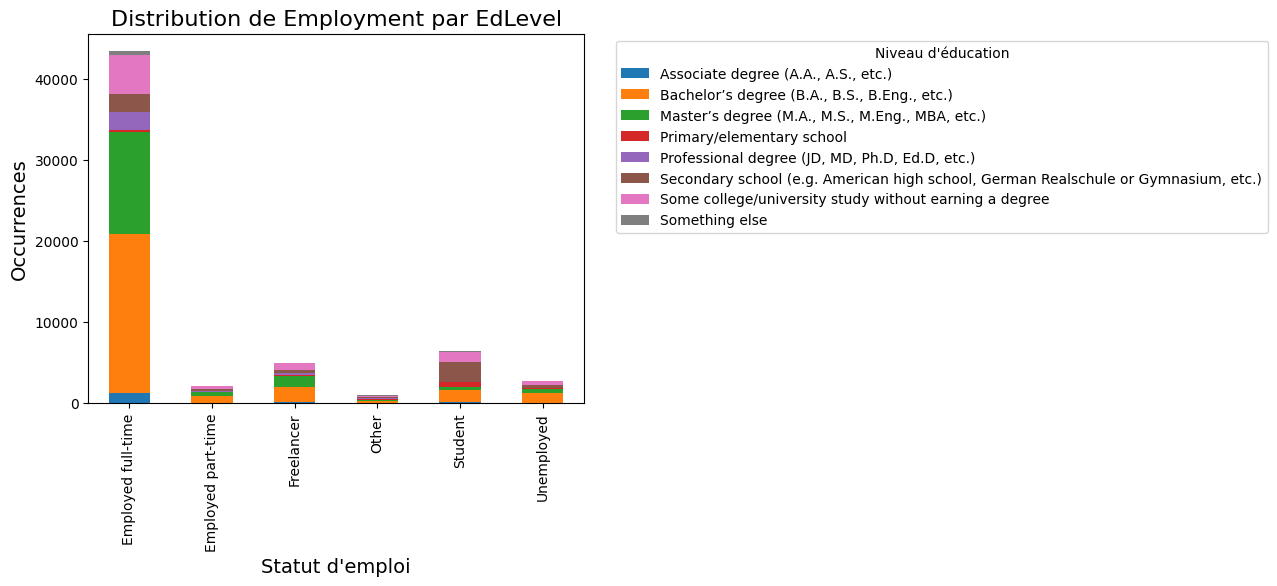

In [171]:
# Tracer un bar plot 
plt.figure(figsize=(12, 30))  # Ajuster la taille pour un affichage clair (largeur x hauteur)

pivot_Employment_EdLevel.plot(kind='bar',stacked=True)

# Personnalisation des axes et du titre
plt.title('Distribution de Employment par EdLevel', fontsize=16)
plt.xlabel('Statut d\'emploi', fontsize=14)
plt.ylabel('Occurrences', fontsize=14)
plt.legend(title='Niveau d\'éducation', bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur
plt.tight_layout()

# Afficher le graphique
plt.show()

### Step 10: Explore other variable and correlation

Explore variable Age

In [4]:
df['Age'].describe()

count               65437
unique                  8
top       25-34 years old
freq                23911
Name: Age, dtype: object

In [5]:
print(df['Age'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


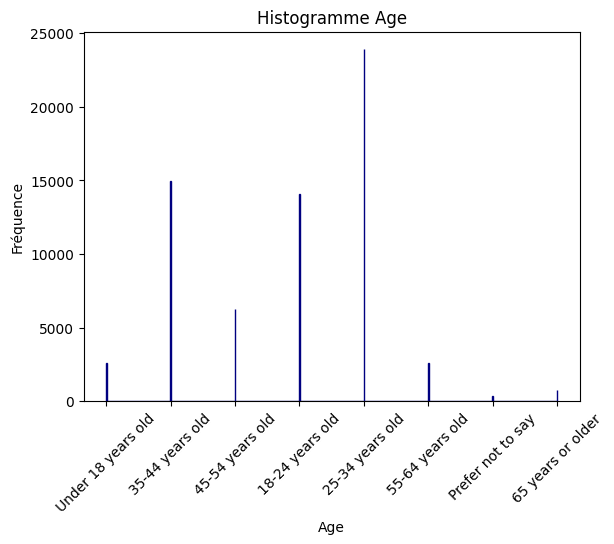

In [7]:
# histogramme avant traitement des NaN
plt.hist(df['Age'], bins=800, color='skyblue', edgecolor='navy')
plt.title('Histogramme Age')
plt.xlabel('Age')
plt.xticks(rotation=45,fontsize=10)
plt.ylabel('Fréquence')
plt.show()

Explore Outlier for CompTotal and ConvertedCompYearly

In [8]:
df['CompTotal'].describe()

count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

Le max observe est aberrant, verifier sur boxplot

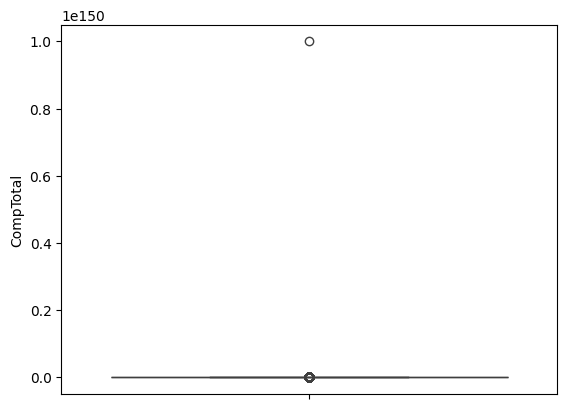

In [9]:
sns.boxplot(data=df['CompTotal'])
plt.show()

In [18]:
nan_comptTotal = df['CompTotal'].isnull().sum()
nan_comptTotal

np.int64(31697)

In [25]:
compt_total_max = df['CompTotal'].max()
compt_total_max

np.float64(1.0000000000000002e+150)

In [21]:
#Test outlier
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
higher_outlier = Q3+(1.5*(Q3-Q1))
higher_outlier

np.float64(535000.0)

In [29]:
comp_total_filtered = df['CompTotal'][df['CompTotal'] <= higher_outlier]
print(comp_total_filtered.describe())

count     27864.000000
mean     117182.605369
std       99970.300622
min           0.000000
25%       50000.000000
50%       88000.000000
75%      150000.000000
max      535000.000000
Name: CompTotal, dtype: float64


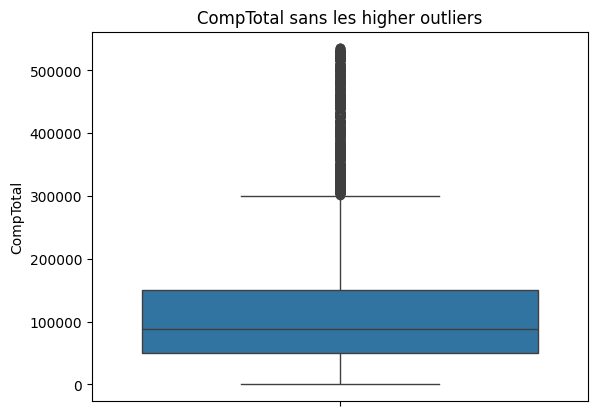

In [32]:
sns.boxplot(data=comp_total_filtered)
plt.title('CompTotal sans les higher outliers') 
plt.show()

In [35]:
print(comp_total_filtered.isnull().sum())

0


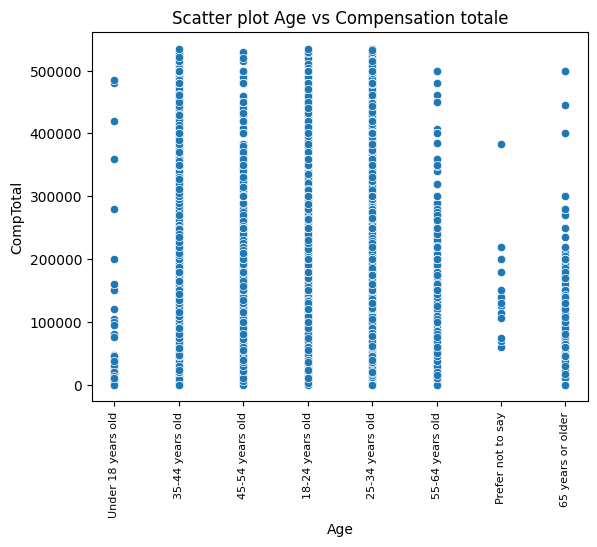

In [40]:
sns.scatterplot(x=df['Age'], y=comp_total_filtered) 
plt.title('Scatter plot Age vs Compensation totale')
plt.xticks(rotation=90, fontsize=8)
plt.show()

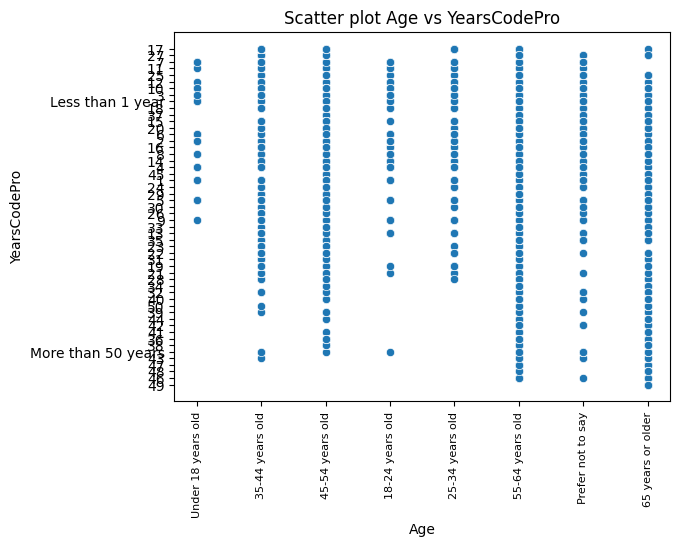

In [44]:
sns.scatterplot(x=df['Age'], y=df['YearsCodePro']) 
plt.title('Scatter plot Age vs YearsCodePro')
plt.xticks(rotation=90, fontsize=8)
plt.show()

### Step 11: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


Modify df original : clean, standardize and remove NaN on specific variable as per needs, as investigated in previous steps

➡️garder seulement les colonnes pertinentes a l'analyse (selon dashboard checklist):

#LanguageWantToWorkWith, DatabaseWantToWorkWith, PlatformWantToWorkWith, WebframeWantToWorkWith

#LanguageHaveWorkedWith ,DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith

#Respondent Classified by Age Group, Employment Status Distribution,Respondent by Country,

#Respondent Classified by Education Level ,Primary Coding Activities

In [60]:
#garder les colonnes d'interet sans avoir a dropper la 100 aine d'autres :)
# Liste des colonnes a garder
columns_to_keep = ['ResponseId','CodingActivities','EdLevel','LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 
                   'PlatformWantToWorkWith', 'WebframeWantToWorkWith', 'LanguageHaveWorkedWith', 
                   'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
                   'Age', 'Employment', 'Country','RemoteWork','ConvertedCompYearly','YearsCodePro']

# Garder uniquement ces colonnes dans un nouveau DataFrame
df_reduced = df[columns_to_keep]

In [54]:
df_reduced.shape

(65437, 17)

In [61]:
missing_value = df_reduced.isnull().sum()
missing_value

ResponseId                    0
CodingActivities          10971
EdLevel                    4653
LanguageWantToWorkWith     9685
DatabaseWantToWorkWith    22879
PlatformWantToWorkWith    30905
WebframeWantToWorkWith    26902
LanguageHaveWorkedWith     5692
DatabaseHaveWorkedWith    15183
PlatformHaveWorkedWith    23071
WebframeHaveWorkedWith    20276
Age                           0
Employment                    0
Country                    6507
RemoteWork                10631
ConvertedCompYearly       42002
YearsCodePro              13827
dtype: int64

🪄 Recap des modifications de cleaning et standardisation a faire pour creer une nouvelle df_cleaned:
- ConvertedCompYearly : CompTotal standardise, remplacer les NaN par la mediane (moins sensible que la moyenne)
- RemoteWork : NaN replaced by mode()[0]
- EdLevel : NaN en 'Unknown'
- Country : NaN en 'Unknown'
- YearsCodePro : remplacer Less than 1 et more than 50 par un nombre, convertir en numeric, remplacer NaN par mean()
- CodingActivities : remplacer NaN par methode 'ffill'
- Toutes les colonnes Langage/Database/Plateform etc... : NaN remplacer par mode()[0]

In [62]:
#convertedCompYearly
median_convertedcompt = df_reduced['ConvertedCompYearly'].median()
df_reduced['ConvertedCompYearly'].fillna(median_convertedcompt, inplace=True)
print(df_reduced['ConvertedCompYearly'].isnull().sum())

0


/tmp/ipykernel_328/2509678056.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reduced['ConvertedCompYearly'].fillna(median_convertedcompt, inplace=True)
/tmp/ipykernel_328/2509678056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['ConvertedCompYearly'].fillna(median_convertedcompt, inplace=True)


In [63]:
#Remote
mode_remote = df_reduced['RemoteWork'].mode()[0]
df_reduced['RemoteWork'].fillna(mode_remote, inplace=True)
print(df_reduced['RemoteWork'].isnull().sum())

0


/tmp/ipykernel_328/2445682028.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reduced['RemoteWork'].fillna(mode_remote, inplace=True)
/tmp/ipykernel_328/2445682028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['RemoteWork'].fillna(mode_remote, inplace=True)


In [66]:
#remplacer les NaN par unknown
df_reduced['Country'].fillna('Unknown', inplace=True)
df_reduced['EdLevel'].fillna('Unknown', inplace=True)

print(df_reduced['Country'].isnull().sum())
print(df_reduced['EdLevel'].isnull().sum())

0
0


/tmp/ipykernel_328/1656125964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reduced['Country'].fillna('Unknown', inplace=True)
/tmp/ipykernel_328/1656125964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['Country'].fillna('Unknown', inplace=True)
/tmp/ipykernel_328/1656125964.py:3: FutureWarning: A value is trying to b

In [67]:
#YearsCodePro
#remplacer les 'chaines string' par une valeur numerique
df_reduced['YearsCodePro'].replace({
    'Less than 1 year': 1,
    'More than 50 years': 51
}, inplace=True)
#convertir en numeric
df_reduced['YearsCodePro']=pd.to_numeric(df_reduced['YearsCodePro'], errors='coerce')    
#remplacer NaN par mean
mean_yearscodepro = df_reduced['YearsCodePro'].mean()
df_reduced['YearsCodePro'].fillna(mean_yearscodepro, inplace=True)

print(df_reduced['YearsCodePro'].isnull().sum())

0


/tmp/ipykernel_328/4277271475.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reduced['YearsCodePro'].replace({
/tmp/ipykernel_328/4277271475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['YearsCodePro'].replace({
/tmp/ipykernel_328/4277271475.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [69]:
#CodingActivities : remplacer NaN par methode ffill
df_reduced['CodingActivities'].fillna(method='ffill',inplace=True)
print(df_reduced['CodingActivities'].isnull().sum())

0


/tmp/ipykernel_328/1748358704.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reduced['CodingActivities'].fillna(method='ffill',inplace=True)
/tmp/ipykernel_328/1748358704.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_reduced['CodingActivities'].fillna(method='ffill',inplace=True)
/tmp/ipykernel_328/1748358704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [70]:
#Quantitative variables : calculate mode for tech variables
mode_langHWW = df_reduced['LanguageHaveWorkedWith'].mode()[0]
mode_langWTWW =df_reduced['LanguageWantToWorkWith'].mode()[0]
mode_dbHWW = df_reduced['DatabaseHaveWorkedWith'].mode()[0]
mode_dbWTWW = df_reduced['DatabaseWantToWorkWith'].mode()[0]
mode_platHWW = df_reduced['PlatformHaveWorkedWith'].mode()[0]
mode_platWTWW =df_reduced['PlatformWantToWorkWith'].mode()[0]
mode_webHWW = df_reduced['WebframeHaveWorkedWith'].mode()[0]
mode_webWTWW =df_reduced['WebframeWantToWorkWith'].mode()[0]

#replace NaN by mode
df_reduced['LanguageHaveWorkedWith'].fillna(mode_langHWW,inplace=True)
df_reduced['LanguageWantToWorkWith'].fillna(mode_langWTWW,inplace=True)

df_reduced['DatabaseHaveWorkedWith'].fillna(mode_dbHWW,inplace=True)
df_reduced['DatabaseWantToWorkWith'].fillna(mode_dbWTWW,inplace=True)

df_reduced['PlatformHaveWorkedWith'].fillna(mode_platHWW,inplace=True)
df_reduced['PlatformWantToWorkWith'].fillna(mode_platWTWW,inplace=True)

df_reduced['WebframeHaveWorkedWith'].fillna(mode_webHWW,inplace=True)
df_reduced['WebframeWantToWorkWith'].fillna(mode_webWTWW,inplace=True)

/tmp/ipykernel_328/684112910.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reduced['LanguageHaveWorkedWith'].fillna(mode_langHWW,inplace=True)
/tmp/ipykernel_328/684112910.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['LanguageHaveWorkedWith'].fillna(mode_langHWW,inplace=True)
/tmp/ipykernel_328/684112910.py:13: Fut

In [71]:
#check for NaN handling
print(df_reduced['LanguageHaveWorkedWith'].isnull().sum())
print(df_reduced['LanguageWantToWorkWith'].isnull().sum())
print(df_reduced['DatabaseHaveWorkedWith'].isnull().sum())
print(df_reduced['DatabaseWantToWorkWith'].isnull().sum())
print(df_reduced['PlatformHaveWorkedWith'].isnull().sum())
print(df_reduced['PlatformWantToWorkWith'].isnull().sum())
print(df_reduced['WebframeHaveWorkedWith'].isnull().sum())
print(df_reduced['WebframeWantToWorkWith'].isnull().sum())

0
0
0
0
0
0
0
0


In [72]:
total_nan = df_reduced.isnull().sum()
total_nan

ResponseId                0
CodingActivities          0
EdLevel                   0
LanguageWantToWorkWith    0
DatabaseWantToWorkWith    0
PlatformWantToWorkWith    0
WebframeWantToWorkWith    0
LanguageHaveWorkedWith    0
DatabaseHaveWorkedWith    0
PlatformHaveWorkedWith    0
WebframeHaveWorkedWith    0
Age                       0
Employment                0
Country                   0
RemoteWork                0
ConvertedCompYearly       0
YearsCodePro              0
dtype: int64

In [73]:
df_reduced.describe()

,ResponseId,ConvertedCompYearly,YearsCodePro
count,65437.000000,6.543700e+04,65437.000000
mean,32719.000000,7.257636e+04,10.239682
std,18890.179119,1.122207e+05,8.037621
min,1.000000,1.000000e+00,1.000000
25%,16360.000000,6.500000e+04,4.000000
50%,32719.000000,6.500000e+04,10.000000
75%,49078.000000,6.500000e+04,12.000000
max,65437.000000,1.625660e+07,51.000000


In [74]:
df_reduced.shape

(65437, 17)

🔍Comment analyser : 🔍

-Employment : categoriser (voir LAB 12)

-EdLevel : categoriser (voir LAB 12)

-YearsCodePro : 

-Country : garder les pays qui contribuent a 80% du dataset, le reste en 'Other' (voir LAB 12)

-Coding langage : split, explode etc...(voir LAB 12)

In [75]:
df_reduced.to_csv('dataset_cleaned_280325.csv')

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
